In [6]:
library(ggthemes)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/aggregate_envs/"

In [8]:
snp = "ENSG00000226278_PSPHP1-7_7_55802063_T_C"
# snp = "ENSG00000111671_SPSB2-12_6979010_G_A"
# snp = "ENSG00000147813_NAPRT1-8_144676862_C_T"
# snp = "ENSG00000165650_PDZD8-10_119020736_A_C"
# snp = "ENSG00000229150_CRYGEP-2_208977797_G_T"
# snp = "ENSG00000173401_GLIPR1L1-12_75737206_G_A"

In [9]:
filename = paste0(dir, snp,".csv")

In [10]:
df = read.csv(filename, row.names = 1)
head(df)

,aggr_env,gene,snp
0,-0.019913369,-0.373544,0
1,-0.007377307,-0.373544,0
2,0.007200517,-0.373544,0
3,0.015465270,1.369856,1
4,0.033966481,-0.373544,0
5,0.015702299,-0.373544,0


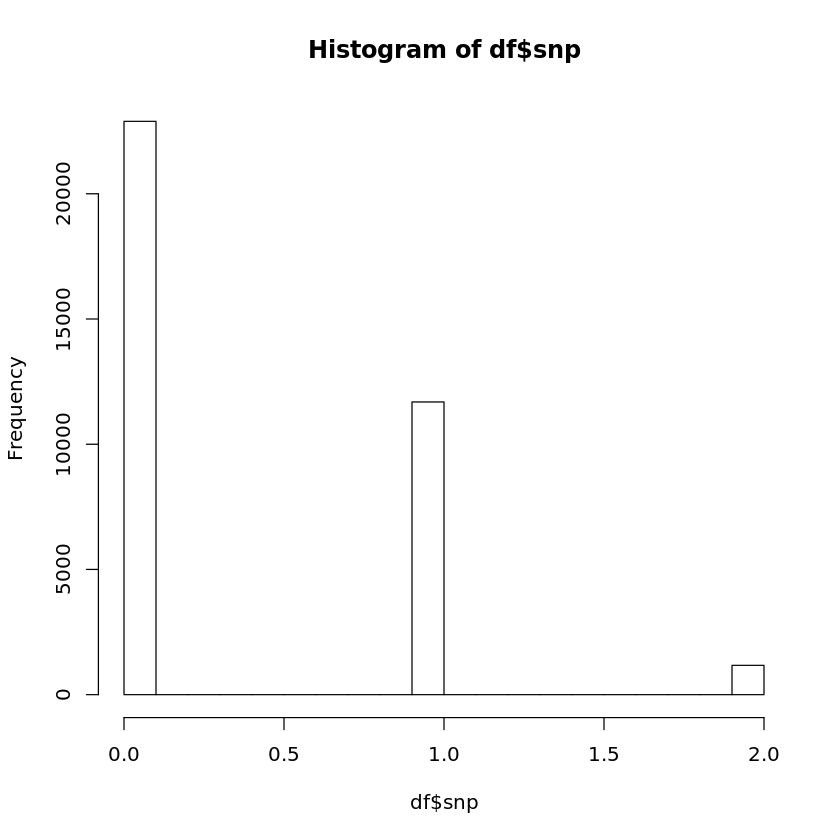

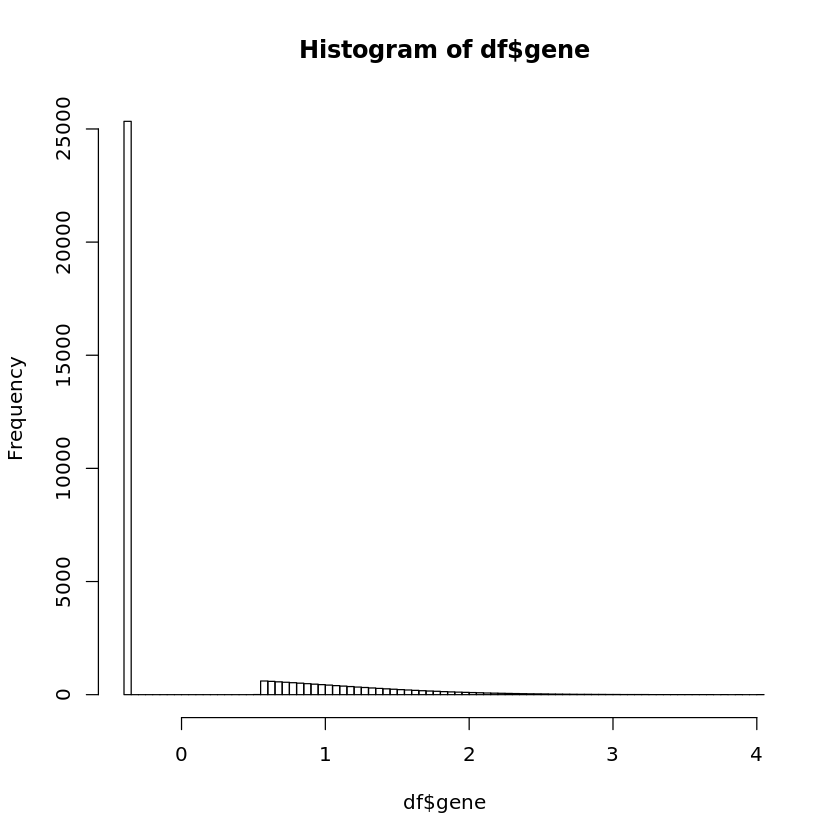

In [11]:
hist(df$snp)
# hist(df$gene[df$gene>0], breaks = 100)
hist(df$gene, breaks = 100)

`geom_smooth()` using formula 'y ~ x'


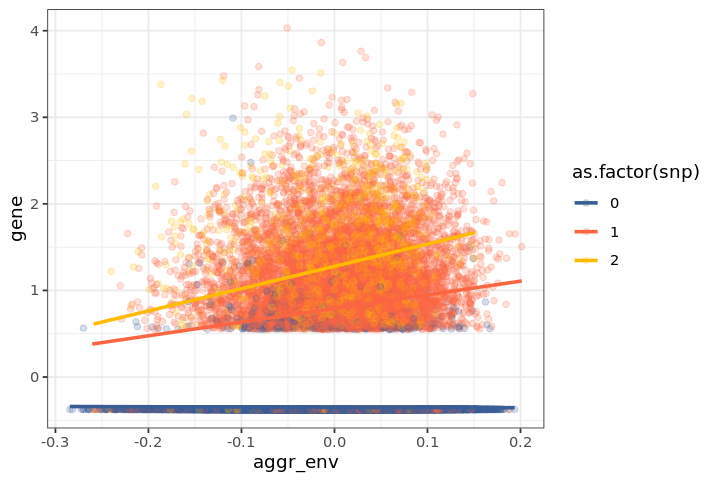

In [12]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, 
# ggplot(df[df$gene>-3,],
       aes(x = aggr_env, y = gene, colour = as.factor(snp))) + geom_point(alpha = 0.2) + 
    theme_bw() + geom_smooth(method = "lm", se=F) + scale_color_canva(palette = "Primary colors with a vibrant twist")

In [13]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [16]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [17]:
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))$x
head(pca.500hvgs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
21843_1#10,-11.7695261,-12.53787,1.182187,-12.382809,-7.138403,-3.4703788,2.937177,-1.4780896,-2.9866449,-3.499148,...,0.2160482,-0.001807227,-0.4704439,-0.38897205,-0.9991925,-0.6878494,-0.22135254,-0.01443568,1.2095867,-0.006544411
21843_1#100,5.1315308,-27.27887,7.580548,-8.358297,-1.009093,-1.7577853,-6.091796,0.8270303,-8.8730029,3.518848,...,0.3031433,1.166374296,0.9316655,0.89767361,-0.8016822,0.2290320,0.64763610,0.85628896,-1.3086225,-0.007651583
21843_1#101,-0.6430211,-23.48309,-1.000591,-3.088449,-1.289849,-1.5541213,-1.469672,0.2329820,-0.7080887,5.016711,...,-0.7761433,0.031156078,0.1829774,-0.14923369,-0.5788981,0.2717518,0.75835568,0.00108464,0.1528594,-0.002594181
21843_1#102,-14.5080208,-12.97380,1.756366,-5.051092,-13.428509,-4.9241155,3.345865,1.1722049,1.1701299,1.799291,...,-1.1940182,0.653650128,-1.4879523,0.40670022,0.1799348,-1.2709706,-0.03973878,0.39435883,0.3794893,-0.003221728
21843_1#103,-5.8029849,-18.93912,-3.213669,-2.972856,-7.899498,0.3855256,3.110171,2.0104264,-0.4341895,-2.414581,...,-0.9986720,0.344452018,-0.6746511,-0.09003629,-0.9505944,-0.5087790,-0.27308513,0.78496806,-0.3265529,-0.005177596
21843_1#105,-2.3442226,-20.86842,-2.850288,-3.369348,-1.915029,-9.2527614,1.396011,2.1962256,-6.2875656,-4.725231,...,-1.8174132,0.912610178,-0.8024645,-0.66096338,-1.1554879,0.1583705,-0.94767054,0.13668247,1.3098005,-0.003567344


In [18]:
sample_mapping = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/aggregate_envs/cell_ids.csv", row.names = 1)
head(sample_mapping)

,genotype_individual_id,phenotype_sample_id
0,HPSI0114i-joxm_1,21843_1#10
1,HPSI0314i-fafq_1,21843_1#100
2,HPSI0314i-fafq_1,21843_1#101
3,HPSI1013i-wuye_2,21843_1#102
4,HPSI0114i-joxm_1,21843_1#103
5,HPSI0114i-iisa_3,21843_1#105


In [19]:
df1 = sample_mapping
df1$cell = df1$phenotype_sample_id

In [30]:
df0 = as.data.frame(pca.500hvgs)
df0$cell = rownames(df0)

In [33]:
df2 = inner_join(df0,df1,by="cell")
df3 = cbind(df,df2)
head(df3)

Warning message:
“Column `cell` joining character vector and factor, coercing into character vector”

,aggr_env,gene,snp,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC494,PC495,PC496,PC497,PC498,PC499,PC500,cell,genotype_individual_id,phenotype_sample_id
0,-0.019913369,-0.373544,0,-11.7695261,-12.53787,1.182187,-12.382809,-7.138403,-3.4703788,2.937177,...,-0.38897205,-0.9991925,-0.6878494,-0.22135254,-0.01443568,1.2095867,-0.006544411,21843_1#10,HPSI0114i-joxm_1,21843_1#10
1,-0.007377307,-0.373544,0,5.1315308,-27.27887,7.580548,-8.358297,-1.009093,-1.7577853,-6.091796,...,0.89767361,-0.8016822,0.2290320,0.64763610,0.85628896,-1.3086225,-0.007651583,21843_1#100,HPSI0314i-fafq_1,21843_1#100
2,0.007200517,-0.373544,0,-0.6430211,-23.48309,-1.000591,-3.088449,-1.289849,-1.5541213,-1.469672,...,-0.14923369,-0.5788981,0.2717518,0.75835568,0.00108464,0.1528594,-0.002594181,21843_1#101,HPSI0314i-fafq_1,21843_1#101
3,0.015465270,1.369856,1,-14.5080208,-12.97380,1.756366,-5.051092,-13.428509,-4.9241155,3.345865,...,0.40670022,0.1799348,-1.2709706,-0.03973878,0.39435883,0.3794893,-0.003221728,21843_1#102,HPSI1013i-wuye_2,21843_1#102
4,0.033966481,-0.373544,0,-5.8029849,-18.93912,-3.213669,-2.972856,-7.899498,0.3855256,3.110171,...,-0.09003629,-0.9505944,-0.5087790,-0.27308513,0.78496806,-0.3265529,-0.005177596,21843_1#103,HPSI0114i-joxm_1,21843_1#103
5,0.015702299,-0.373544,0,-2.3442226,-20.86842,-2.850288,-3.369348,-1.915029,-9.2527614,1.396011,...,-0.66096338,-1.1554879,0.1583705,-0.94767054,0.13668247,1.3098005,-0.003567344,21843_1#105,HPSI0114i-iisa_3,21843_1#105


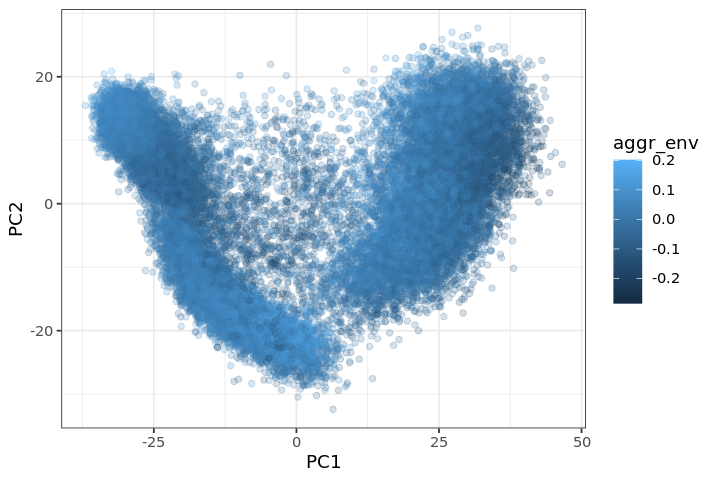

In [38]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df3, 
       aes(x = PC1, y = PC2, colour = aggr_env)) + geom_point(alpha = 0.2) + 
    theme_bw() + scale_